1 Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

Линейная регрессия: m=2.3967226394082446, c=0.3390666145854008


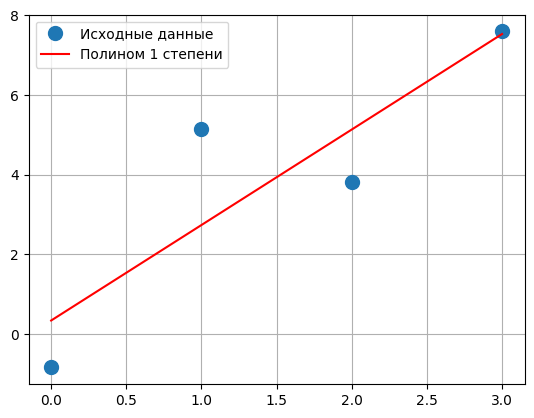

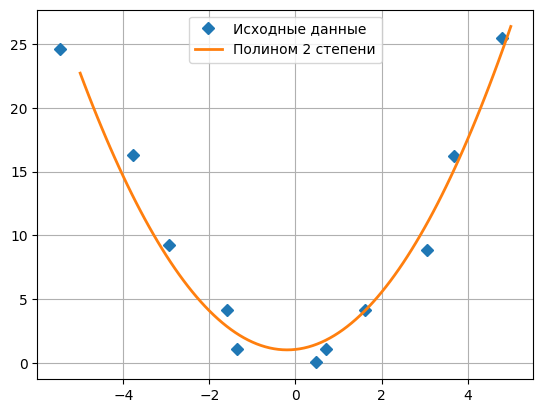

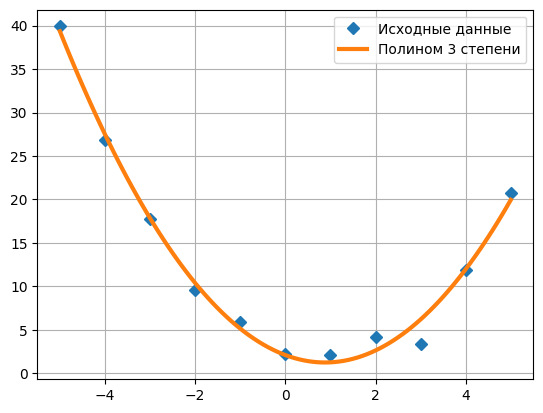

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from numpy.random import *

# Линейная регрессия
x = linspace(0, 3, 4)
y = 2 * x + 1 + randn(4)

A = vstack([x, ones(len(x))]).T

m, c = linalg.lstsq(A, y, rcond=None)[0]
print(f"Линейная регрессия: m={m}, c={c}")

plt.figure()
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Полином 1 степени')
plt.legend()
plt.grid()
plt.show()

# Квадратичная регрессия
delta = 1.0
x_1 = linspace(-5, 5, 11)
y_1 = x_1 ** 2 + delta * (rand(11) - 0.5)
x_1 += delta * (rand(11) - 0.5)

x_1.tofile('x_data.txt', '\n')
y_1.tofile('y_data.txt', '\n')
x_1 = fromfile('x_data.txt', float, sep='\n')
y_1 = fromfile('y_data.txt', float, sep='\n')

# Квадратичная регрессия
m = vstack((x_1 ** 2, x_1, ones(11))).T
s = linalg.lstsq(m, y_1, rcond=None)[0]

plt.figure()
x_prec = linspace(-5, 5, 101)
plt.plot(x_1, y_1, 'D', label='Исходные данные')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2, label='Полином 2 степени')
plt.legend()
plt.grid()
plt.show()

# Полином третьей степени
x_2 = linspace(-5, 5, 11)
a, b, c = 1, -2, 3
y_2 = a * x_2 ** 2 + b * x_2 + c + randn(11) * 2

m = vstack((x_2 ** 2, x_2, ones(11))).T
s = linalg.lstsq(m, y_2, rcond=None)[0]

plt.figure()
plt.plot(x_2, y_2, 'D', label='Исходные данные')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=3, label='Полином 3 степени')
plt.legend()
plt.grid()
plt.show()

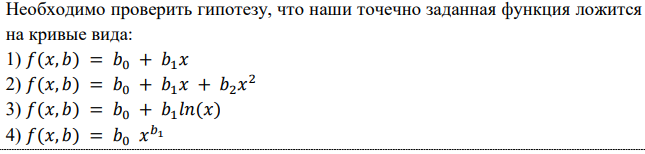

Линейная функция, b = [0.23509808 0.7525084 ]
Квадратичное отклонение (лин. функция): 0.33817449895384394


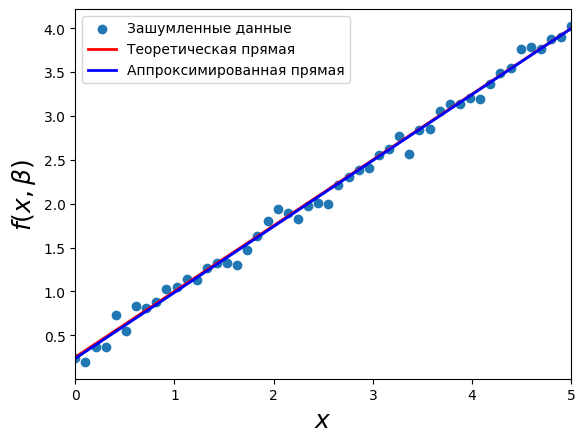

Квадратичная функция, b = [ 1.02216464 -1.03848335  0.50806271]
Квадратичное отклонение (квадр. функция): 0.5266946691777306


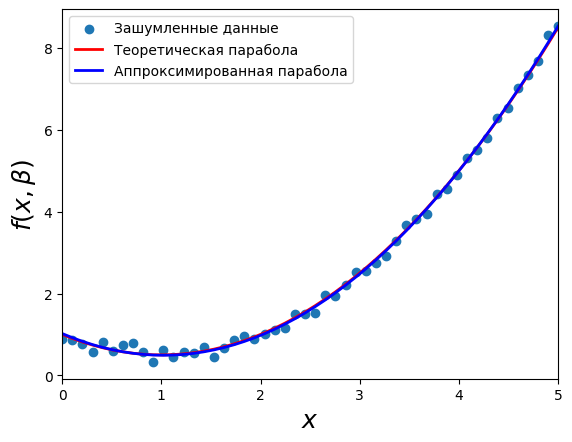

Логарифмическая функция, b = [0.48332239 2.00943013]
Квадратичное отклонение (лог. функция): 0.0843841129133734


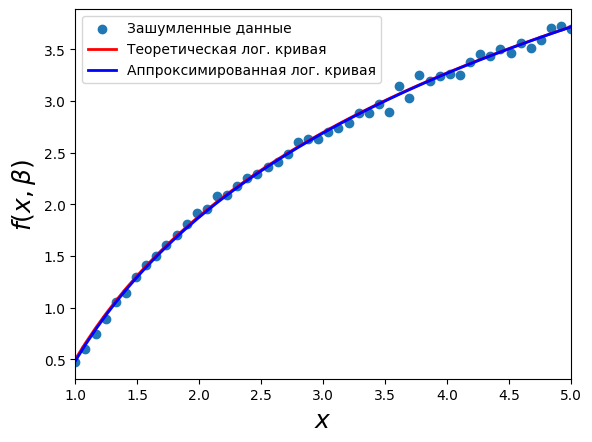

Степенная функция, b = [1.98175354 1.50664834]
Квадратичное отклонение (степ. функция): 0.4497194166054623


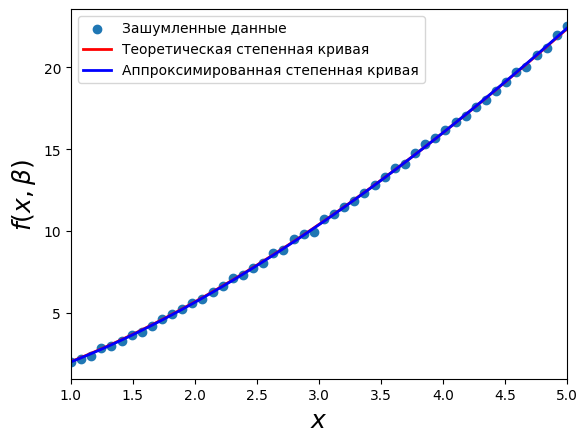

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
from scipy import optimize

# Линейная функция
beta = (0.25, 0.75)
def f1(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f1(xdata, *beta)
ydata = y + 0.1 * np.random.randn(len(xdata))

beta_opt, beta_cov = optimize.curve_fit(f1, xdata, ydata)
print("Линейная функция, b =", beta_opt)

residuals = ydata - f1(xdata, *beta_opt)
fres = sum(residuals ** 2)
print("Квадратичное отклонение (лин. функция):", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Зашумленные данные')
ax.plot(xdata, y, 'r', lw=2, label='Теоретическая прямая')
ax.plot(xdata, f1(xdata, *beta_opt), 'b', lw=2, label='Аппроксимированная прямая')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()

# Квадратичная функция
beta = (1.0, -1.0, 0.5)
def f2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

y = f2(xdata, *beta)
ydata = y + 0.1 * np.random.randn(len(xdata))

beta_opt, beta_cov = optimize.curve_fit(f2, xdata, ydata)
print("Квадратичная функция, b =", beta_opt)

residuals = ydata - f2(xdata, *beta_opt)
fres = sum(residuals ** 2)
print("Квадратичное отклонение (квадр. функция):", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Зашумленные данные')
ax.plot(xdata, y, 'r', lw=2, label='Теоретическая парабола')
ax.plot(xdata, f2(xdata, *beta_opt), 'b', lw=2, label='Аппроксимированная парабола')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()

# Логарифмическая функция
beta = (0.5, 2.0)
def f3(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f3(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = optimize.curve_fit(f3, xdata, ydata)
print("Логарифмическая функция, b =", beta_opt)

residuals = ydata - f3(xdata, *beta_opt)
fres = sum(residuals ** 2)
print("Квадратичное отклонение (лог. функция):", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Зашумленные данные')
ax.plot(xdata, y, 'r', lw=2, label='Теоретическая лог. кривая')
ax.plot(xdata, f3(xdata, *beta_opt), 'b', lw=2, label='Аппроксимированная лог. кривая')
ax.set_xlim(1, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()

# Степенная функция
beta = (2.0, 1.5)
def f4(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 5, 50)
y = f4(xdata, *beta)
ydata = y + 0.1 * np.random.randn(len(xdata))

beta_opt, beta_cov = optimize.curve_fit(f4, xdata, ydata)
print("Степенная функция, b =", beta_opt)

residuals = ydata - f4(xdata, *beta_opt)
fres = sum(residuals ** 2)
print("Квадратичное отклонение (степ. функция):", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Зашумленные данные')
ax.plot(xdata, y, 'r', lw=2, label='Теоретическая степенная кривая')
ax.plot(xdata, f4(xdata, *beta_opt), 'b', lw=2, label='Аппроксимированная степенная кривая')
ax.set_xlim(1, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()

2 Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 12187

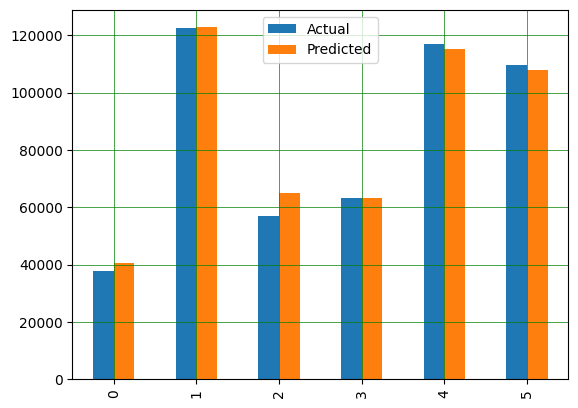

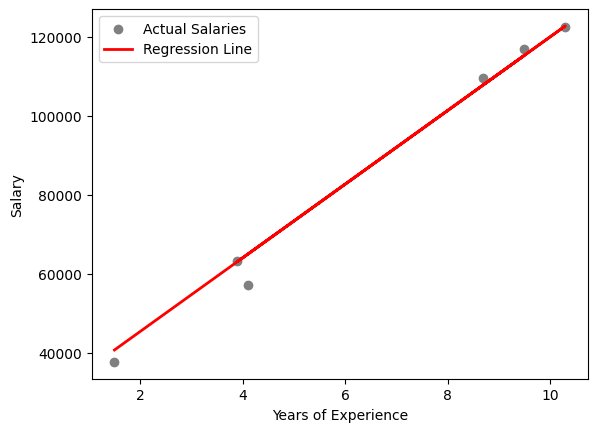

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)

print(dataset.head())

print(dataset.shape)
print(dataset.describe())

X = dataset[['YearsExperience']].values
y = dataset['Salary'].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Intercept:", regressor.intercept_)
print("Coefficient:", regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray', label='Actual Salaries')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

З Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
                              Coefficient
Petrol_tax                     -40.016660
Average_income                  -0.065413
Paved_Highways                  -0.004741
Population_Driver_licence(%)  1341.862121
    Actual   Predicted
29     534  469.391989
4      410  545.645464
26     577  589.668394
30     571  569.730413
32     577  649.774809
37     704  646.631164
34     487

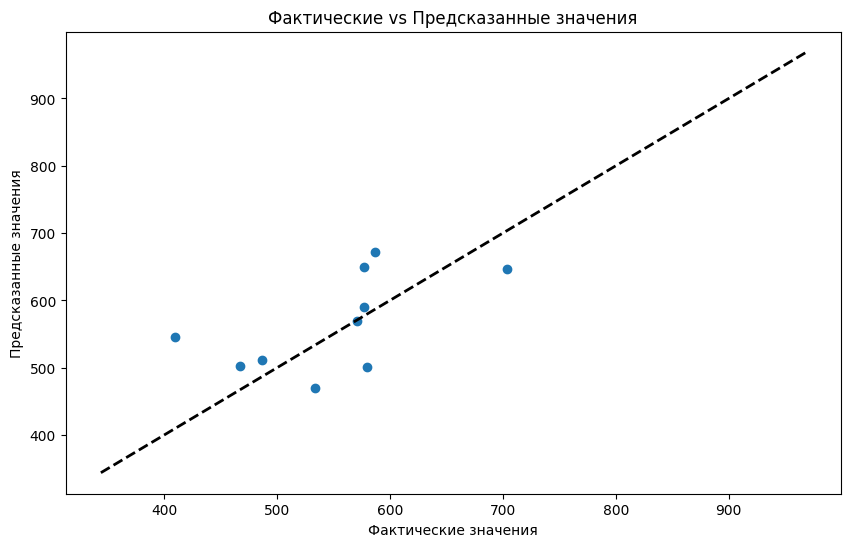

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
dataset = pd.read_csv(url)

print(dataset.head())

X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

4 Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

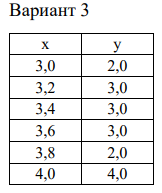

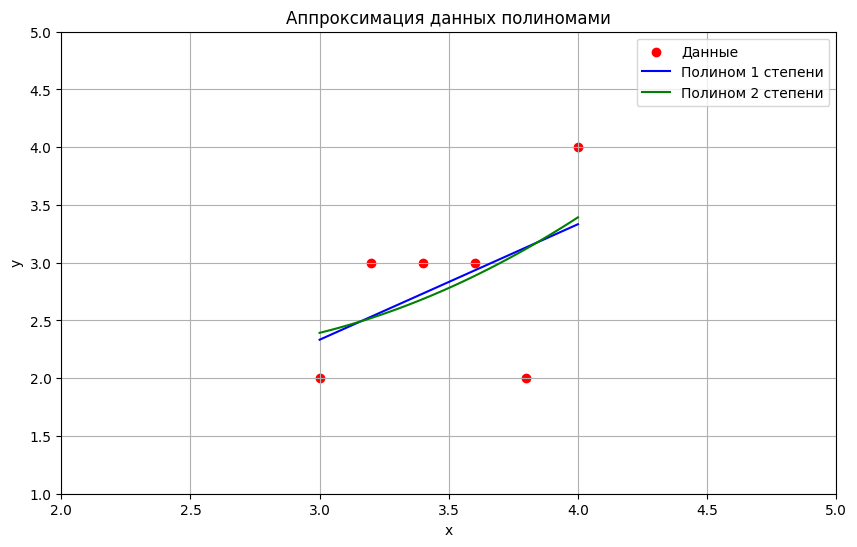

Коэффициенты полинома 1 степени: [ 1.         -0.66666667]
Коэффициенты полинома 2 степени: [ 0.44642857 -2.125       4.75      ]
Таблица значений полинома 1 степени:
x: 3.00, y: 2.33
x: 3.01, y: 2.34
x: 3.02, y: 2.35
x: 3.03, y: 2.36
x: 3.04, y: 2.37
x: 3.05, y: 2.38
x: 3.06, y: 2.39
x: 3.07, y: 2.40
x: 3.08, y: 2.41
x: 3.09, y: 2.42
x: 3.10, y: 2.43
x: 3.11, y: 2.44
x: 3.12, y: 2.45
x: 3.13, y: 2.46
x: 3.14, y: 2.47
x: 3.15, y: 2.48
x: 3.16, y: 2.49
x: 3.17, y: 2.51
x: 3.18, y: 2.52
x: 3.19, y: 2.53
x: 3.20, y: 2.54
x: 3.21, y: 2.55
x: 3.22, y: 2.56
x: 3.23, y: 2.57
x: 3.24, y: 2.58
x: 3.25, y: 2.59
x: 3.26, y: 2.60
x: 3.27, y: 2.61
x: 3.28, y: 2.62
x: 3.29, y: 2.63
x: 3.30, y: 2.64
x: 3.31, y: 2.65
x: 3.32, y: 2.66
x: 3.33, y: 2.67
x: 3.34, y: 2.68
x: 3.35, y: 2.69
x: 3.36, y: 2.70
x: 3.37, y: 2.71
x: 3.38, y: 2.72
x: 3.39, y: 2.73
x: 3.40, y: 2.74
x: 3.41, y: 2.75
x: 3.42, y: 2.76
x: 3.43, y: 2.77
x: 3.44, y: 2.78
x: 3.45, y: 2.79
x: 3.46, y: 2.80
x: 3.47, y: 2.81
x: 3.48, y: 2.82


In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

coeffs_first = np.polyfit(x, y, 1)
poly_first = np.poly1d(coeffs_first)

coeffs_second = np.polyfit(x, y, 2)
poly_second = np.poly1d(coeffs_second)

x_fit = np.linspace(min(x), max(x), 100)
y_fit_first = poly_first(x_fit)
y_fit_second = poly_second(x_fit)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Данные')
plt.plot(x_fit, y_fit_first, label='Полином 1 степени', color='blue')
plt.plot(x_fit, y_fit_second, label='Полином 2 степени', color='green')

plt.xlim(min(x) - 1, max(x) + 1)
plt.ylim(min(y) - 1, max(y) + 1)

plt.title('Аппроксимация данных полиномами')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Коэффициенты полинома 1 степени:", coeffs_first)
print("Коэффициенты полинома 2 степени:", coeffs_second)

print("Таблица значений полинома 1 степени:")
for val in x_fit:
    print(f"x: {val:.2f}, y: {poly_first(val):.2f}")

print("\nТаблица значений полинома 2 степени:")
for val in x_fit:
    print(f"x: {val:.2f}, y: {poly_second(val):.2f}")